In [1]:
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
%pylab inline
# so the plots are embedded in notebook rather than a stand alone window

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression

Populating the interactive namespace from numpy and matplotlib


# Last slide, overfitting plot

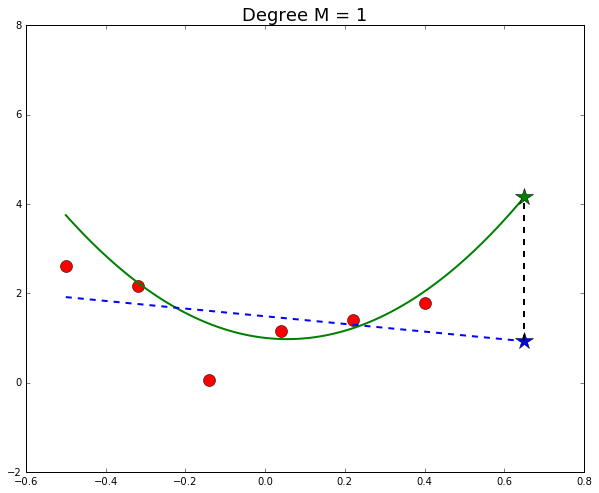

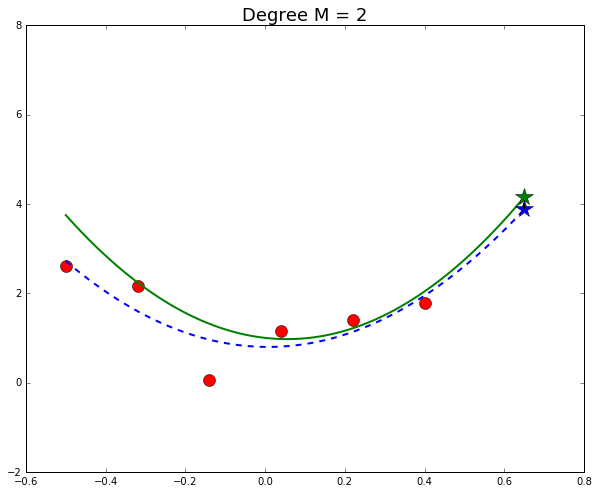

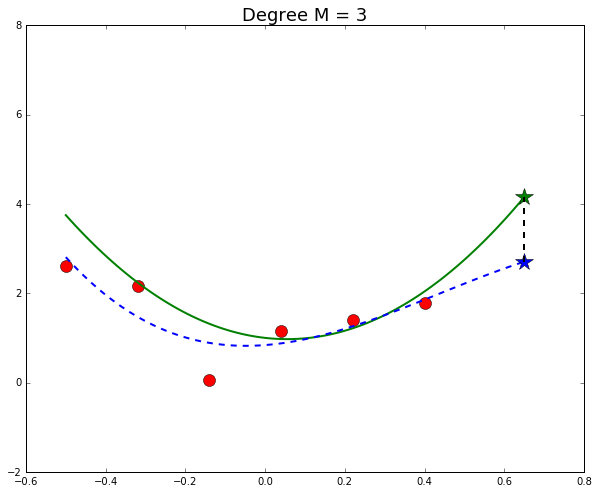

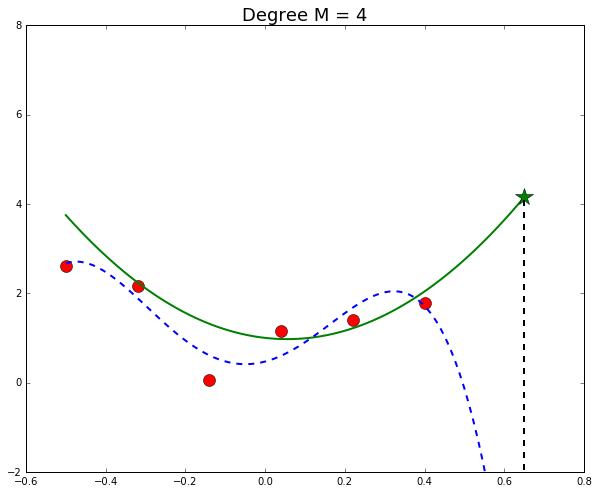

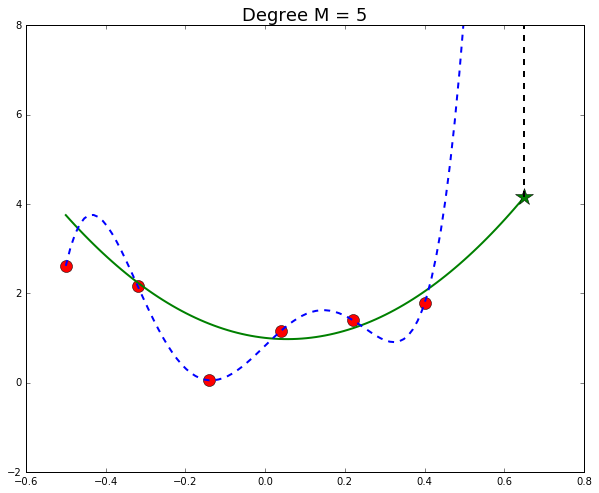

In [44]:
f = lambda x: 9*x**2 - x + 1

sp = -0.5
ep = 0.4

np.random.seed(55)        # Please use the same seed if you want to obtain identical plots as above
x = np.linspace(sp,ep,6)
eps = np.random.normal(0,0.7,6)
y = f(x) + eps

data3 = pd.DataFrame([y]+[x**(i+1) for i in range(5)]).T
data3.columns = ['y']+['x%d'%(i+1) for i in range(5)]

def MultiReg(data, degree):
    # First create a string for controlling the number of x_i
    string = ''
    for i in range(degree):
        string += str(i+1)  # For example, if degree == 3, then this string would be '123' at the end
    formula = 'y ~ x' + ' + x'.join(string) # join function will convert '123' to '1 + x2 + x3'

    # Perform regression and return the results
    lm = smf.ols(formula = formula, data = data).fit()
    return lm.rsquared, lm.params


# Run the function and store the results separately
R2 = []; Params = []
for M in range(1,6):
    a,b = MultiReg(data3,M)  # For each M, run the function
    R2.append(a)
    Params.append(b)

#Q3 See how $R^2$ increases as the degree of polynomial increases 
# plt.plot(range(1,6),R2,'ro--', markersize = 8)
# plt.xlabel('Degree M of polynomial', fontsize = 14)
# plt.ylabel('$R^2$ of the model', fontsize = 16)
# plt.show()

plt.figure(figsize = (20,15))

for M in range(1,6):
    plt.figure(figsize = (10,8))
    x_fit = np.linspace(sp,0.65,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed
    y_out = 0
    x_out = 0.65
    for i in range(len(Params[M-1])):
        y_out += Params[M-1][i] * (x_out**i)
    plt.plot(data3.x1, data3.y, 'ro', markersize = 12)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)
    plt.plot(x_fit, y_fit, 'b--', lw = 2)
    plt.title('Degree M = %d'%(M), fontsize = 18)
    plt.ylim([-2,8])
    plt.plot(x_out, y_out, 'b*', markersize = 18)
    plt.plot(x_out, f(x_out), 'g*', markersize = 18)
    plt.plot([x_out,x_out], [y_out, f(x_out)], 'k--', lw = 2)
    plt.show()

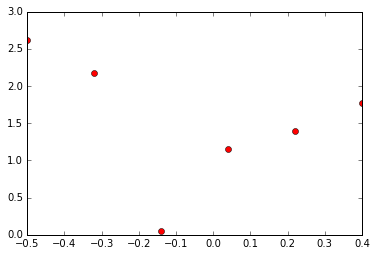

In [45]:
plt.plot(data3.x1,data3.y,'or')

data3.iloc[:,:2].to_csv('H33.csv',index = False)

# Second to last slide, 3D plot

In [47]:
data3.describe()

,y,x1,x2,x3,x4,x5
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.527058,-0.050000,0.097000,-0.014300,0.016886,-0.003984
std,0.893350,0.336749,0.094722,0.062751,0.024357,0.014126
min,0.049546,-0.500000,0.001600,-0.125000,0.000003,-0.031250
25%,1.218085,-0.275000,0.026800,-0.025262,0.000874,-0.002530
50%,1.585403,-0.050000,0.075400,-0.001340,0.006414,-0.000027
75%,2.071073,0.175000,0.145600,0.008002,0.021821,0.000387
max,2.613388,0.400000,0.250000,0.064000,0.062500,0.010240


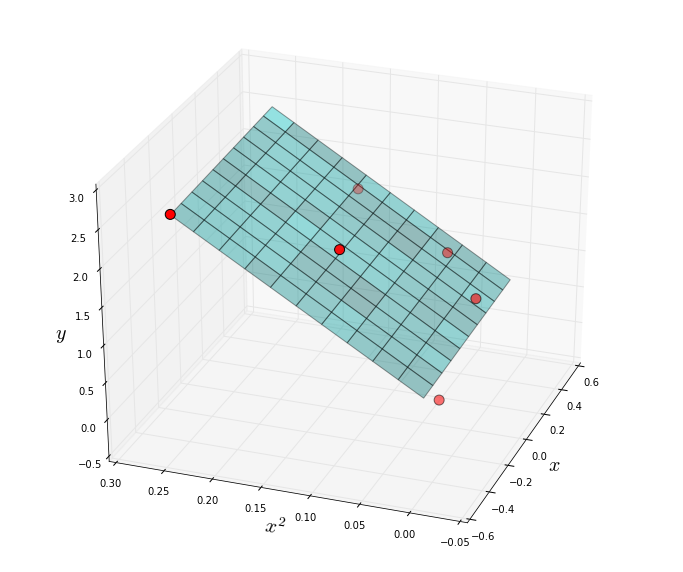

In [53]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(data3.x1, data3.x2, data3.y, s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
x1, x2 = np.meshgrid(np.linspace(sp,ep,100), np.linspace(0,0.25,100))
fit_y = Params[1][0] - Params[1][1] * x1 + Params[1][2] * x2

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1, x2, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x$', fontsize = 20)
ax.set_ylabel('$x^2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 200)   # Controls the viewing angle